In [18]:
import matplotlib
import cv2 as cv
import numpy as np
from PIL import Image
from matplotlib import pyplot as plt

In [19]:
def load_images_as_array(file_paths):
    """
    Load images from file paths and save them as a NumPy array.

    Parameters:
    - file_paths (list): List of file paths for the images.

    Returns:
    - images_array (numpy.ndarray): NumPy array containing the images.
    """

    # Initialize an empty list to store individual image arrays
    images_list = []

    # Loop through each file path and load the image
    for file_path in file_paths:
        try:
            # Open the image using PIL
            img = Image.open(file_path)

            # Convert the image to a NumPy array
            img_array = np.array(img)

            # Append the array to the list
            images_list.append(img_array)
        except Exception as e:
            print(f"Error loading image at {file_path}: {e}")

    return images_list

# Example usage:
file_paths = ["./images/crack1.jpg", "./images/crack2.jpeg", "./images/crack3.jpg"]
loaded_images = load_images_as_array(file_paths)

def convert_to_cv2(np_img): 
    cv2_image = cv.cvtColor(np_img, cv2.IMREAD_GRAYSCALE)
    return cv2_image

In [53]:
def img_proc(img):
    img = cv.imread(img, cv.IMREAD_GRAYSCALE)
    # Blur image 
    blur_xk = 21
    img = blur_image(img, (blur_xk, blur_xk))
    # Canny edge detection
    canny_min = 50; canny_max = 100; 
    edges = cv.Canny(img, 50, 100)
    # Plot images
    show = True
    if show: 
        plt.figure(figsize=(15, 10))
        plt.subplot(121),plt.imshow(img,cmap = 'gray')
        plt.title('Original Image'), plt.xticks([]), plt.yticks([])
        plt.subplot(122),plt.imshow(edges,cmap = 'gray')
        plt.title('Edge Image'), plt.xticks([]), plt.yticks([])
        plt.show()
    return edges

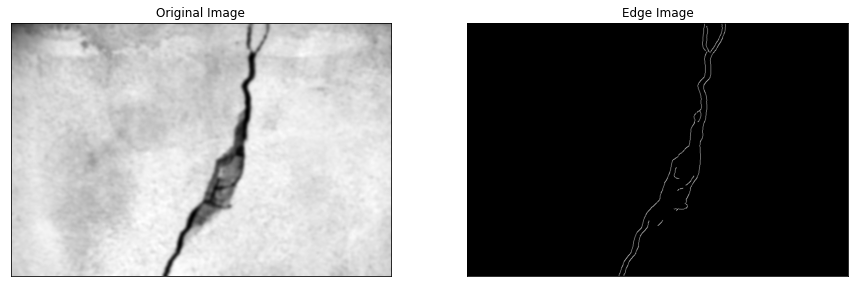

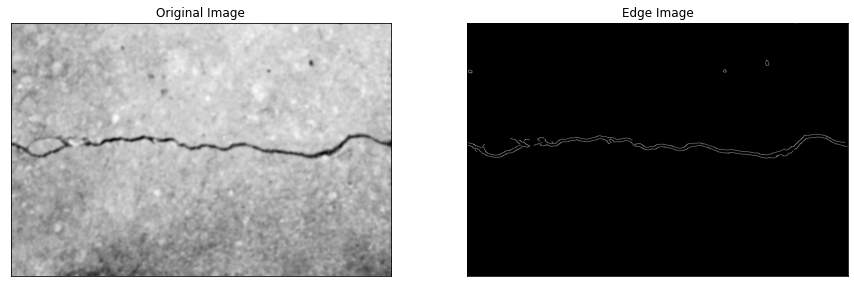

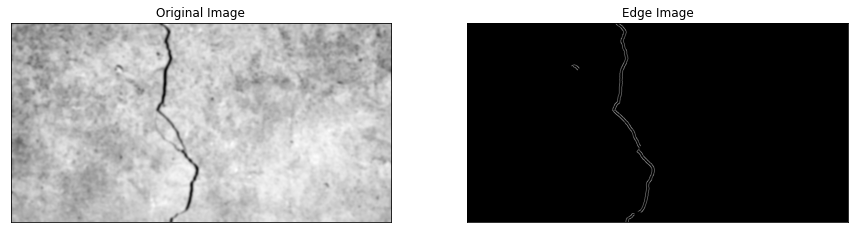

In [54]:
canny_edge_detection(file_paths[0])
canny_edge_detection(file_paths[1])
canny_edge_detection(file_paths[2])

In [38]:
def blur_image(image, kernel_size=(5, 5)):
    """
    Blur an image using Gaussian blur in OpenCV.

    Parameters:
    - image (numpy.ndarray): Input image.
    - kernel_size (tuple): Size of the Gaussian kernel. Default is (5, 5).

    Returns:
    - blurred_image (numpy.ndarray): Blurred image.
    """

    # Apply Gaussian blur
    blurred_image = cv.GaussianBlur(image, kernel_size, 0)

    return blurred_image